In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions
import random

https://www.sciencedirect.com/science/article/pii/S2405844022036209

In [50]:
np.random.seed(42)
pesquisador_1 = np.random.normal(4.31, 0.025, 6)

np.random.seed(2)
pesquisador_2 = np.random.normal(4.32, 0.03, 6)

np.random.seed(2)
pesquisador_3 = np.random.normal(4.31, 0.019, 6)

np.random.seed(5)
pesquisador_4 = np.random.normal(4.31, 0.015, 6)

np.random.seed(10)
pesquisador_5 = np.random.normal(4.31, 0.2, 6)

In [51]:
df = pd.DataFrame({
    "pesquisador_1": pesquisador_1,
    "pesquisador_2": pesquisador_2,
    "pesquisador_3": pesquisador_3,
    "pesquisador_4": pesquisador_4,
    "pesquisador_5": pesquisador_5,    
})

alpha = 0.05

In [52]:
df = df.apply(round, args=(3,))
df.head(10)

,pesquisador_1,pesquisador_2,pesquisador_3,pesquisador_4,pesquisador_5
0,4.322,4.307,4.302,4.317,4.576
1,4.307,4.318,4.309,4.305,4.453
2,4.326,4.256,4.269,4.346,4.001
3,4.348,4.369,4.341,4.306,4.308
4,4.304,4.266,4.276,4.312,4.434
5,4.304,4.295,4.294,4.334,4.166


In [53]:
df.describe()

,pesquisador_1,pesquisador_2,pesquisador_3,pesquisador_4,pesquisador_5
count,6.000000,6.000000,6.00000,6.000000,6.000000
mean,4.318500,4.301833,4.29850,4.320000,4.323000
std,0.017271,0.040573,0.02579,0.016529,0.210612
min,4.304000,4.256000,4.26900,4.305000,4.001000
25%,4.304750,4.273250,4.28050,4.307500,4.201500
50%,4.314500,4.301000,4.29800,4.314500,4.371000
75%,4.325000,4.315250,4.30725,4.329750,4.448250
max,4.348000,4.369000,4.34100,4.346000,4.576000


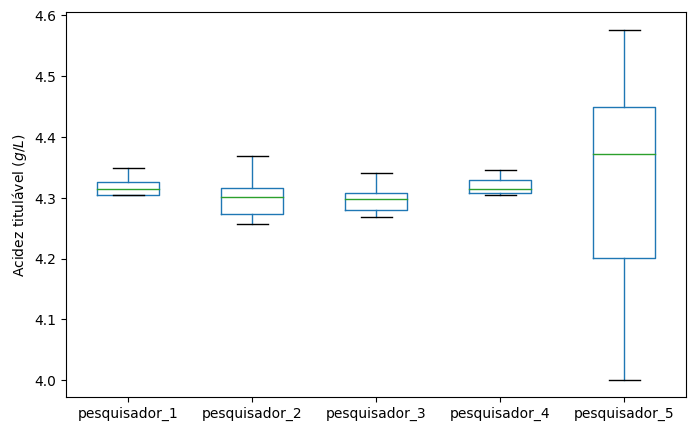

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(grid=False, ax=ax)
ax.set_ylabel("Acidez titulável ($g/L$)")

plt.show()

In [55]:
levene = stats.levene(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4, pesquisador_5)
levene

LeveneResult(statistic=8.248818308678718, pvalue=0.0002192556261824098)

In [56]:
if levene.pvalue < alpha:
    print("Variâncias não homogêneas")
else:
    print("Variâncias homogêneas")

Variâncias não homogêneas


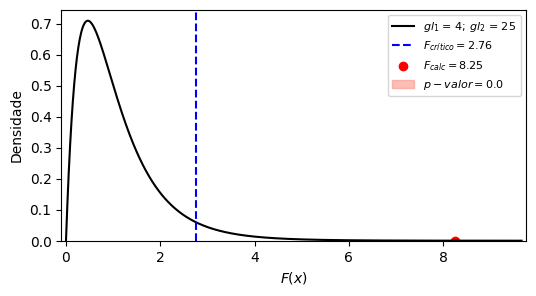

In [57]:
functions.make_f_distribution_plot(levene.statistic, levene.pvalue, gl_numerator=df.shape[1]-1, gl_denominator=df.shape[0]*df.shape[1] - df.shape[1], alpha=alpha)

In [60]:
stats.f_oneway(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4, pesquisador_5)

F_onewayResult(statistic=0.08087358612350729, pvalue=0.9875138923141102)

In [59]:
df.pesquisador_1[0]

4.322